In [ ]:
# Select algorithm to use as machine learner
# 0 = Linear Regression
# 1 = SVR  (not recommended - too slow)
# 2 = Decision Tree
# 3 = Random Forest
# 4 = XGBoost

algorithm_choice = 0

In [1]:
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print "Import successful"

Import successful


In [6]:
try:
    data = pd.io.parsers.read_csv('train_clean.csv')
    
    print "Russian housing training dataset has {} samples with {} features each.".format(*data.shape)
    
except:
    print "Dataset(s) could not be loaded. Please check filename is correct and dataset exists"

Russian housing training dataset has 30471 samples with 97 features each.


In [7]:
try:
    data_test = pd.io.parsers.read_csv('test_clean.csv')
    
    print "Russian housing training dataset has {} samples with {} features each.".format(*data.shape)
    
except:
    print "Dataset(s) could not be loaded. Please check filename is correct and dataset exists"

Russian housing training dataset has 30471 samples with 97 features each.


In [8]:
print "Display sample of training data:"
display(data.head())

Display sample of training data:


,full_sq,life_sq,floor,build_year,max_floor,month_year_cnt,week_year_cnt,kitch_sq,num_room,state,...,mkad_km,public_transport_station_min_walk,incineration_km,cafe_sum_1500_min_price_avg,office_sqm_1500,build_count_monolith,school_quota,prom_part_1000,id,price_doc
0,43.0,27.0,4.0,NaN,NaN,3,1,NaN,NaN,NaN,...,1.422391,3.299822,3.633334,566.67,39554,2.0,11065.0,0.00,1,5850000
1,34.0,19.0,3.0,NaN,NaN,3,2,NaN,NaN,NaN,...,9.503405,0.783160,8.648587,694.12,102910,4.0,6237.0,0.07,2,6000000
2,43.0,29.0,2.0,NaN,NaN,3,2,NaN,NaN,NaN,...,5.604800,3.945073,11.996480,516.67,0,4.0,5580.0,0.29,3,5700000
3,89.0,50.0,9.0,NaN,NaN,39,1,NaN,NaN,NaN,...,2.677824,1.579164,14.317640,673.91,11000,50.0,17063.0,10.35,4,13100000
4,77.0,77.0,4.0,NaN,NaN,39,5,NaN,NaN,NaN,...,11.616653,0.857764,11.903910,766.80,1195735,16.0,7770.0,8.29,5,16331452


In [9]:
print "Display statistics about training data:"
display(data.describe())


Display statistics about training data:


,full_sq,life_sq,floor,build_year,max_floor,month_year_cnt,week_year_cnt,kitch_sq,num_room,state,...,mkad_km,public_transport_station_min_walk,incineration_km,cafe_sum_1500_min_price_avg,office_sqm_1500,build_count_monolith,school_quota,prom_part_1000,id,price_doc
count,30471.000000,24088.000000,30304.000000,1.686600e+04,20899.000000,30471.000000,30471.000000,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,26272.000000,3.047100e+04,25480.000000,23786.000000,30471.000000,30471.000000,3.047100e+04
mean,54.214269,34.403271,7.670803,3.068057e+03,12.558974,860.920121,210.401365,6.399301,1.909804,2.107025,...,6.274764,4.969626,10.884613,714.064298,1.403712e+05,12.043642,8324.970739,8.783209,15236.000000,7.123035e+06
std,38.031487,52.285733,5.319989,1.543878e+05,6.756550,376.290762,110.998142,28.265979,0.851805,0.880148,...,5.142492,15.269861,6.789709,192.259841,3.016844e+05,19.278997,4289.734174,11.517722,8796.364363,4.780111e+06
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,...,0.013626,0.033646,0.198071,300.000000,0.000000e+00,0.000000,1012.000000,0.000000,1.000000,1.000000e+05
25%,38.000000,20.000000,3.000000,1.967000e+03,9.000000,545.000000,126.000000,1.000000,1.000000,1.000000,...,2.633404,1.215747,6.221938,585.710000,0.000000e+00,2.000000,5782.000000,0.000000,7618.500000,4.740002e+06
50%,49.000000,30.000000,6.500000,1.979000e+03,12.000000,839.000000,194.000000,6.000000,2.000000,2.000000,...,5.467510,1.923301,10.324170,692.310000,1.665000e+04,6.000000,7377.000000,4.020000,15236.000000,6.274411e+06
75%,63.000000,43.000000,11.000000,2.005000e+03,17.000000,1143.000000,269.000000,9.000000,2.000000,3.000000,...,8.184752,3.340836,13.393815,821.430000,1.173000e+05,13.000000,9891.000000,12.620000,22853.500000,8.300000e+06
max,5326.000000,7478.000000,77.000000,2.005201e+07,117.000000,1705.000000,627.000000,2014.000000,19.000000,33.000000,...,53.277832,208.956022,58.632050,2500.000000,2.908344e+06,127.000000,24750.000000,72.200000,30471.000000,1.111111e+08


life_sq       0.264987
floor         0.005511
build_year    0.806652
max_floor     0.458012
kitch_sq      0.458012
dtype: float64

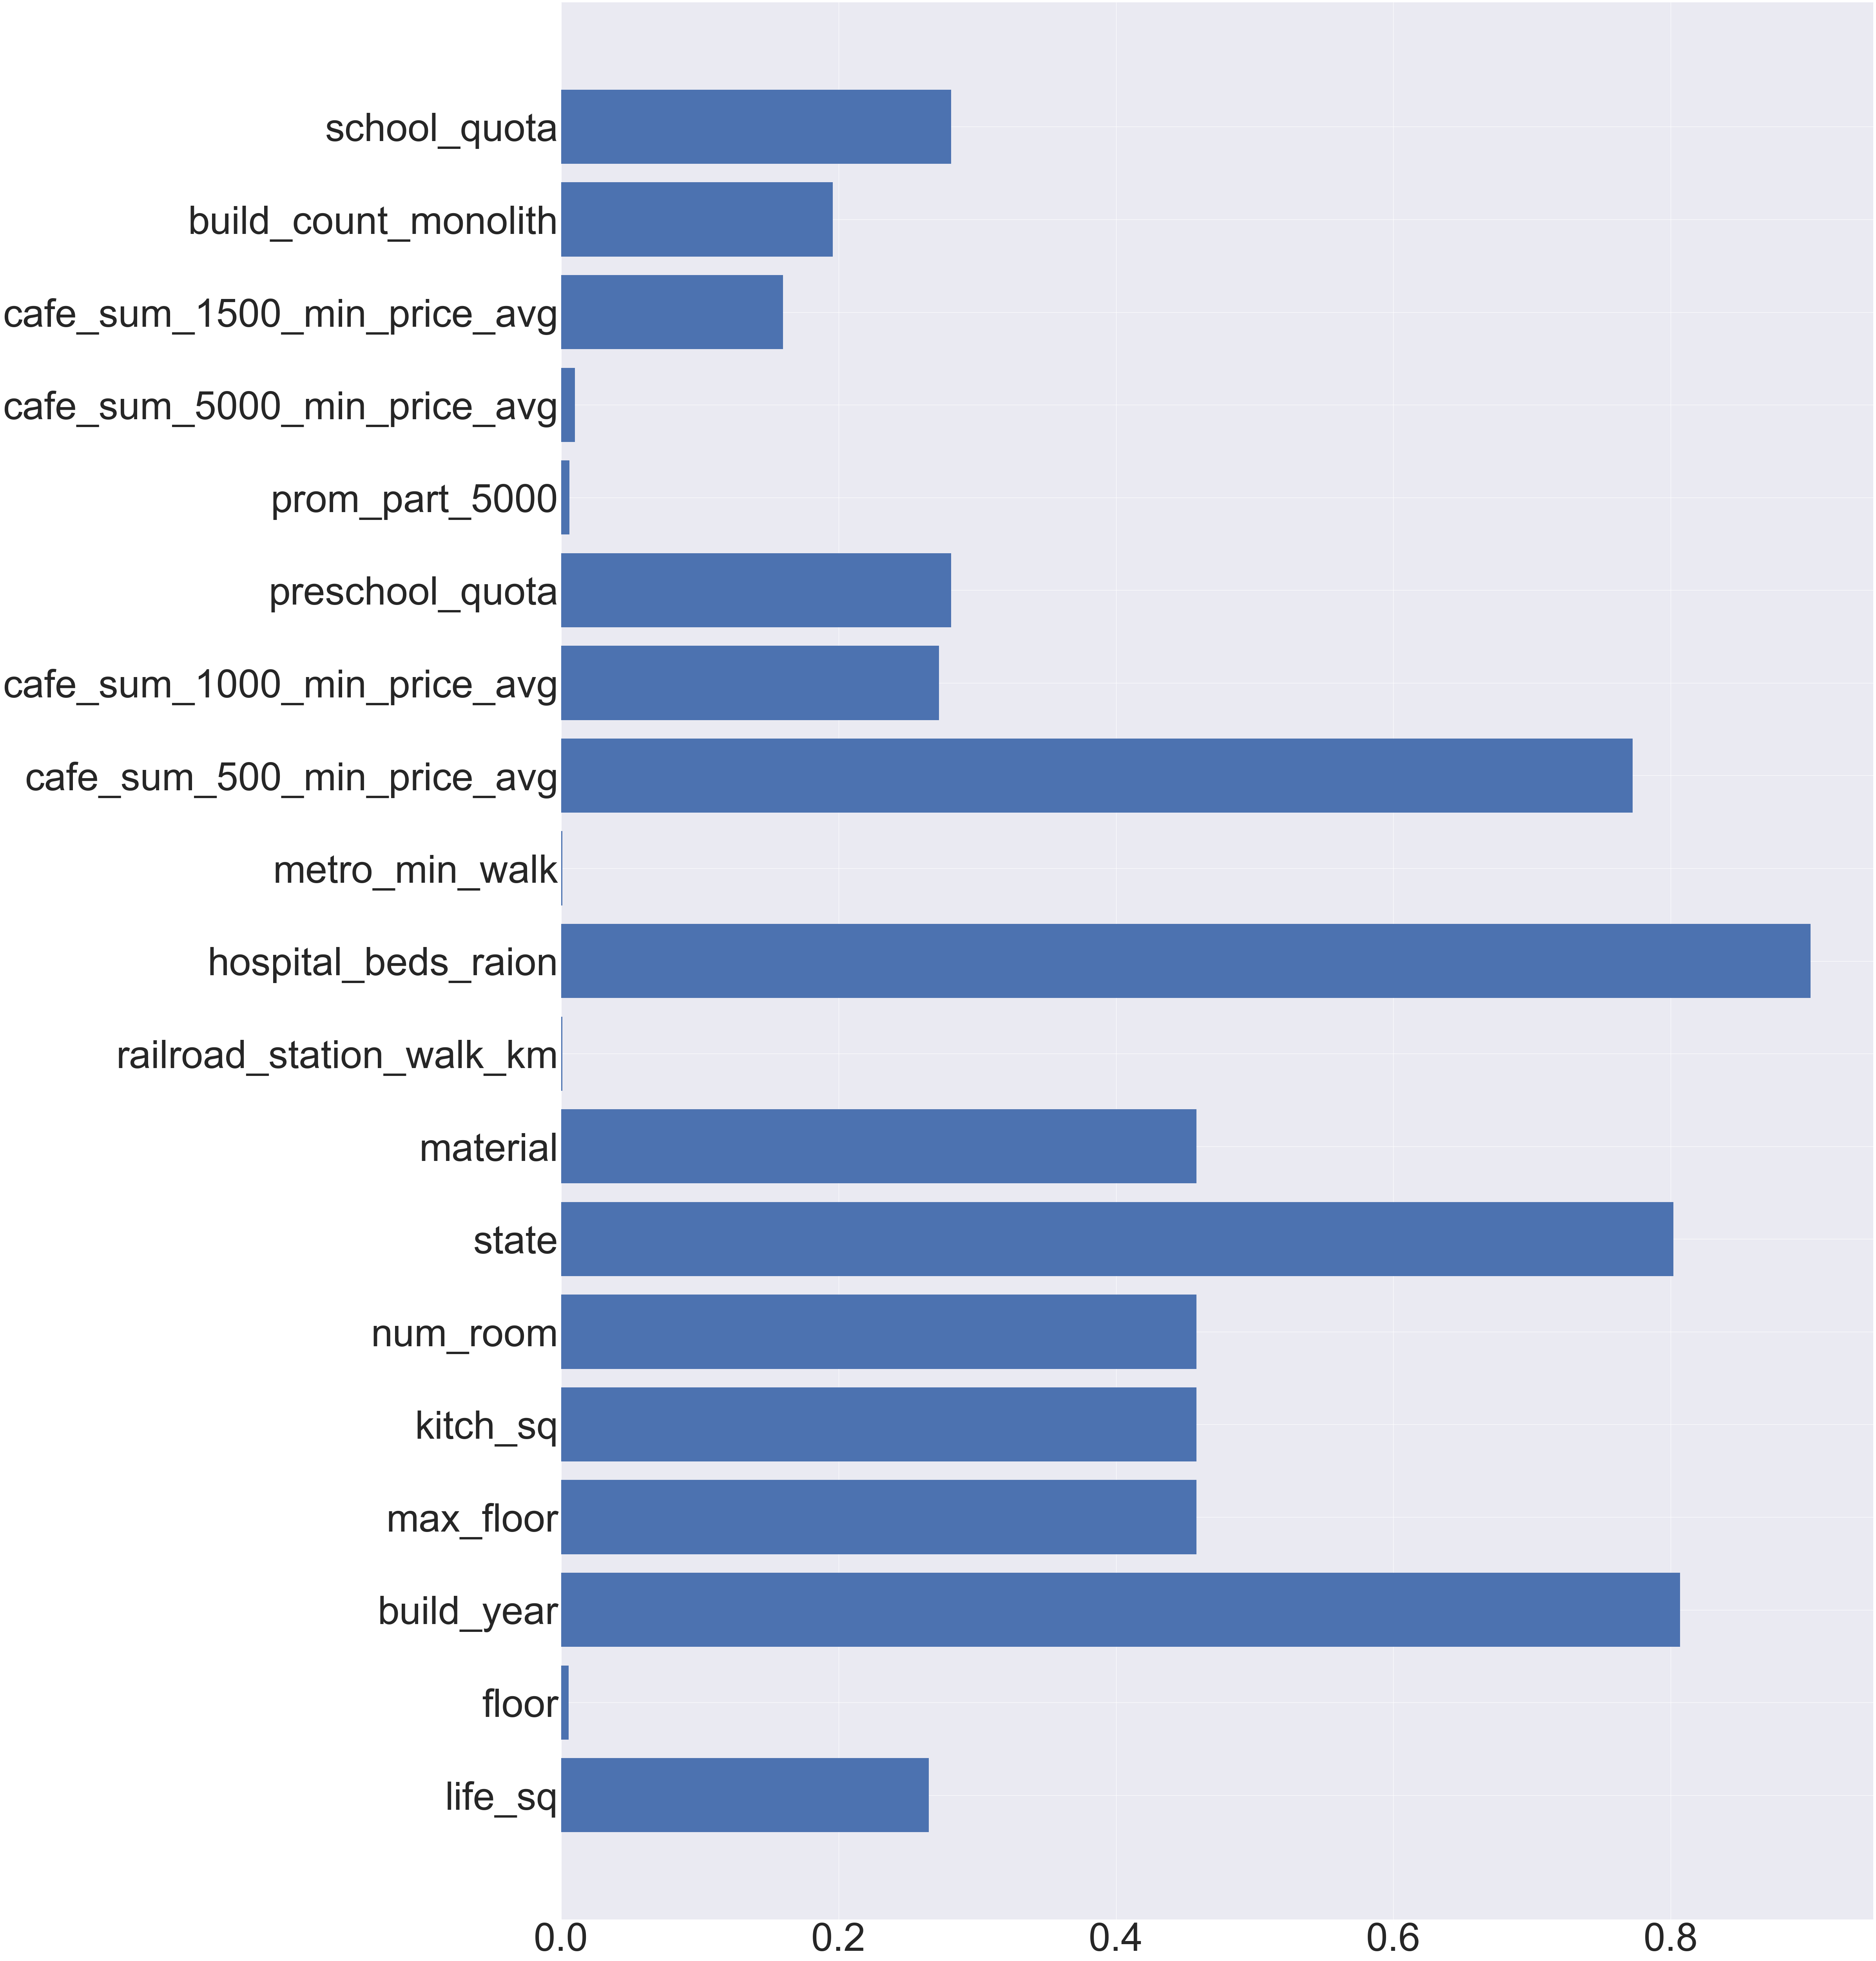

In [7]:
#Ref: http://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-the-column-in-panda-data-frame

nan_counts = data.isnull().sum()
nan_ratios = nan_counts / data.count()
nan_ratios.columns = ["Feature", "Ratio NaN"]
nan_ratios = nan_ratios[nan_ratios > 0]
display(nan_ratios.head())

plt.figure(1)
plt.figure(figsize = (60,90))
plt.tick_params(axis='both', which='major', labelsize=100)
ind = np.arange(nan_ratios.count())
plt.yticks(ind, nan_ratios.index)
plt.barh(ind, nan_ratios, align = "center")
plt.show()

In [43]:
#remove unwanted columns and subset the 40 final features

train_data_features = data[['full_sq', 'life_sq','floor','build_year','max_floor','month_year_cnt','week_year_cnt'
,'kitch_sq','num_room','state','kindergarten_km','radiation_km','school_km','material','metro_min_avto','railroad_km'
,'industrial_km','green_zone_km','theater_km','swim_pool_km','big_church_km','water_km','railroad_station_walk_km','hospice_morgue_km'
,'mosque_km','cemetery_km','fitness_km','nuclear_reactor_km','church_synagogue_km','park_km','green_part_500',
'hospital_beds_raion',
'market_shop_km',
'thermal_power_plant_km',
'sadovoe_km',
'ice_rink_km',
'water_treatment_km',
'office_sqm_500',
'green_part_1500',
'preschool_quota','price_doc']]
print "Russian housing train_data_features dataset has {} samples with {} features each.".format(*train_data_features.shape)

Russian housing train_data_features dataset has 30471 samples with 41 features each.


In [11]:
test_data_features = data_test[['full_sq', 'life_sq','floor','build_year','max_floor','month_year_cnt','week_year_cnt'
,'kitch_sq','num_room','state','kindergarten_km','radiation_km','school_km','material','metro_min_avto','railroad_km'
,'industrial_km','green_zone_km','theater_km','swim_pool_km','big_church_km','water_km','railroad_station_walk_km','hospice_morgue_km'
,'mosque_km','cemetery_km','fitness_km','nuclear_reactor_km','church_synagogue_km','park_km','green_part_500',
'hospital_beds_raion',
'market_shop_km',
'thermal_power_plant_km',
'sadovoe_km',
'ice_rink_km',
'water_treatment_km',
'office_sqm_500',
'green_part_1500',
'preschool_quota']]
print "Russian housing test_data_features dataset has {} samples with {} features each.".format(*test_data_features.shape)

Russian housing test_data_features dataset has 7662 samples with 40 features each.


In [44]:
print "Display statistics about training data:"
display(train_data_features.describe())

Display statistics about training data:


,full_sq,life_sq,floor,build_year,max_floor,month_year_cnt,week_year_cnt,kitch_sq,num_room,state,...,hospital_beds_raion,market_shop_km,thermal_power_plant_km,sadovoe_km,ice_rink_km,water_treatment_km,office_sqm_500,green_part_1500,preschool_quota,price_doc
count,30471.000000,24088.000000,30304.000000,1.686600e+04,20899.000000,30471.000000,30471.000000,20899.000000,20899.000000,16912.000000,...,16030.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,23783.000000,3.047100e+04
mean,54.214269,34.403271,7.670803,3.068057e+03,12.558974,860.920121,210.401365,6.399301,1.909804,2.107025,...,1190.738677,3.958882,7.340116,14.056721,6.123672,11.167613,13983.384333,19.197470,3271.272464,7.123035e+06
std,38.031487,52.285733,5.319989,1.543878e+05,6.756550,376.290762,110.998142,28.265979,0.851805,0.880148,...,1057.015001,3.447536,5.619330,8.343162,4.667856,7.036351,42610.018480,14.200273,2169.759592,4.780111e+06
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.003847,0.400563,0.000355,0.000000,0.274139,0.000000,0.000000,0.000000,1.000000e+05
25%,38.000000,20.000000,3.000000,1.967000e+03,9.000000,545.000000,126.000000,1.000000,1.000000,1.000000,...,520.000000,1.543631,3.770411,8.346336,3.043924,5.304559,0.000000,8.470000,1874.000000,4.740002e+06
50%,49.000000,30.000000,6.500000,1.979000e+03,12.000000,839.000000,194.000000,6.000000,2.000000,2.000000,...,990.000000,2.927417,5.892381,12.748712,5.546687,10.378040,0.000000,14.950000,2854.000000,6.274411e+06
75%,63.000000,43.000000,11.000000,2.005000e+03,17.000000,1143.000000,269.000000,9.000000,2.000000,3.000000,...,1786.000000,5.485423,9.818719,18.716620,7.956727,16.791370,0.000000,26.690000,4050.000000,8.300000e+06
max,5326.000000,7478.000000,77.000000,2.005201e+07,117.000000,1705.000000,627.000000,2014.000000,19.000000,33.000000,...,4849.000000,41.103651,56.856147,68.853047,46.037198,47.591240,611015.000000,90.410000,11926.000000,1.111111e+08


life_sq       0.264987
floor         0.005511
build_year    0.806652
max_floor     0.458012
kitch_sq      0.458012
dtype: float64

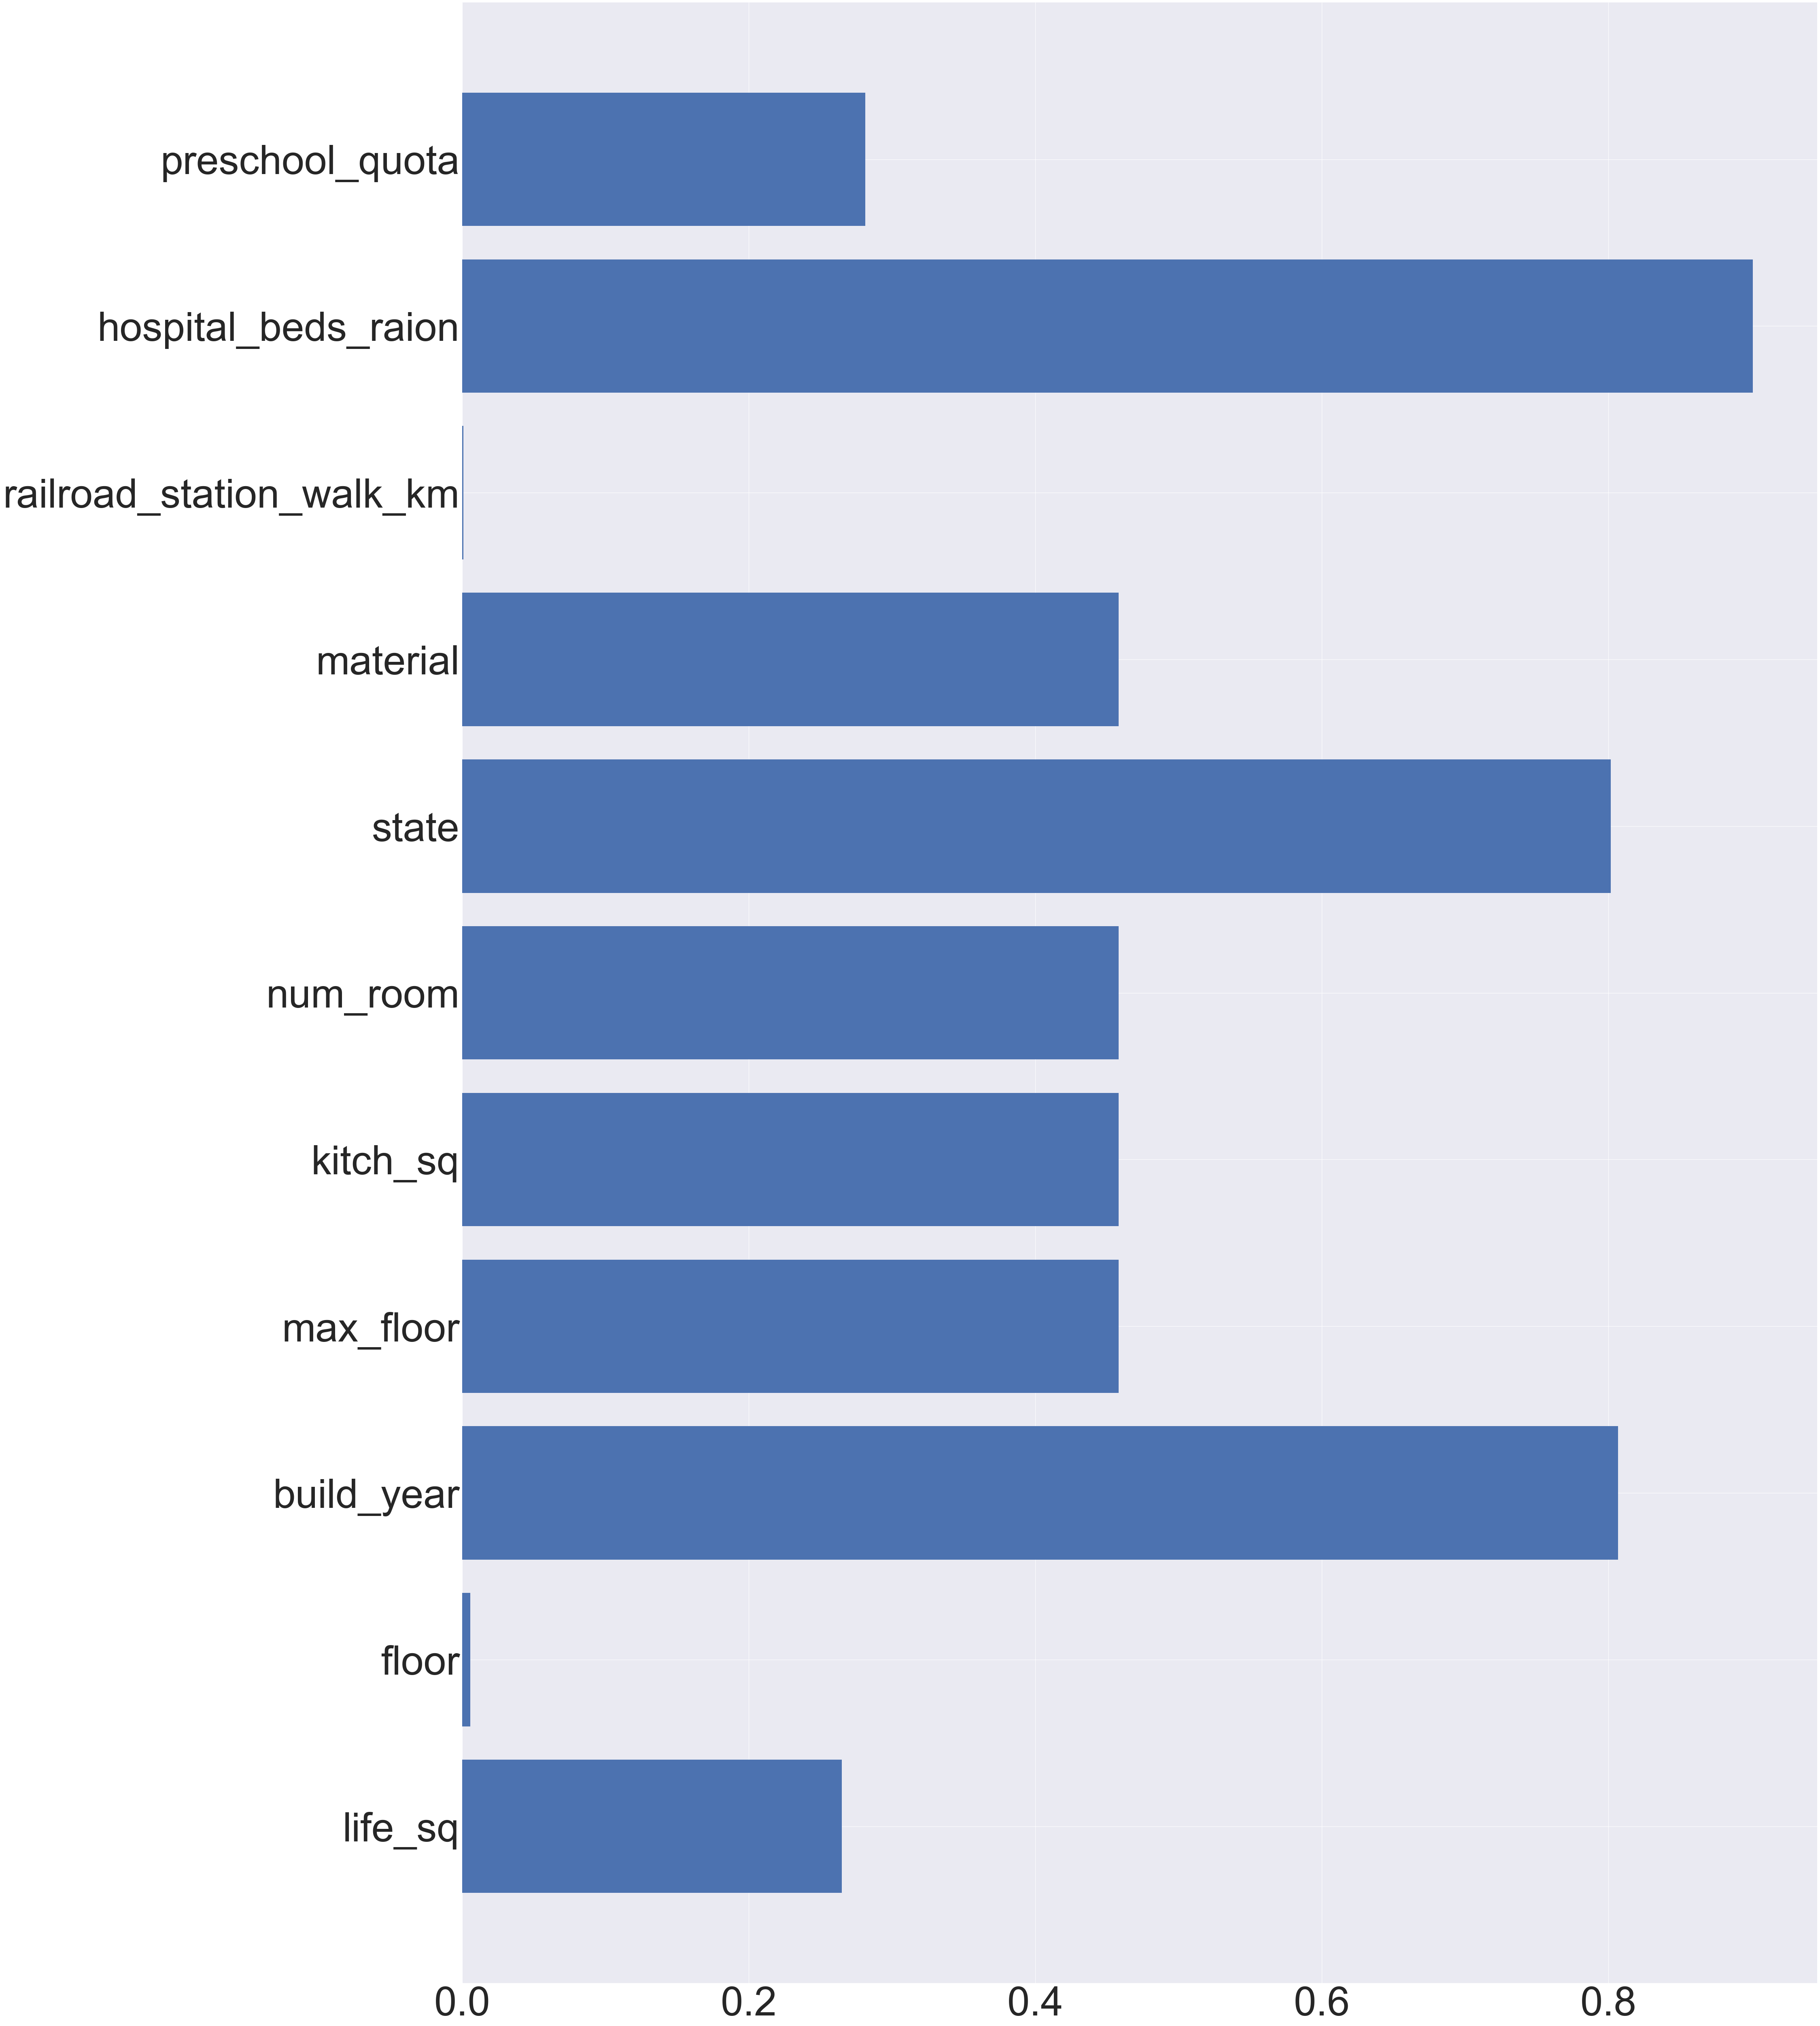

In [45]:
# train_data_features missing value plot

nan_counts = train_data_features.isnull().sum()
nan_ratios = nan_counts / train_data_features.count()
nan_ratios.columns = ["Feature", "Ratio NaN"]
nan_ratios = nan_ratios[nan_ratios > 0]
display(nan_ratios.head())

plt.figure(1)
plt.figure(figsize = (60,90))
plt.tick_params(axis='both', which='major', labelsize=100)
ind = np.arange(nan_ratios.count())
plt.yticks(ind, nan_ratios.index)
plt.barh(ind, nan_ratios, align = "center")
plt.show()

In [47]:
print "Display sample of train_data_features :"
display(train_data_features.head())

Display sample of train_data_features :


,full_sq,life_sq,floor,build_year,max_floor,month_year_cnt,week_year_cnt,kitch_sq,num_room,state,...,hospital_beds_raion,market_shop_km,thermal_power_plant_km,sadovoe_km,ice_rink_km,water_treatment_km,office_sqm_500,green_part_1500,preschool_quota,price_doc
0,43.0,27.0,4.0,NaN,NaN,3,1,NaN,NaN,NaN,...,240.0,1.676258,5.814135,13.100618,1.107594,23.683460,0,14.27,5001.0,5850000
1,34.0,19.0,3.0,NaN,NaN,3,2,NaN,NaN,NaN,...,229.0,3.424716,3.419574,6.444333,8.972823,1.317476,0,21.53,3119.0,6000000
2,43.0,29.0,2.0,NaN,NaN,3,2,NaN,NaN,NaN,...,1183.0,1.375443,3.682455,6.963403,1.978517,4.912660,0,9.92,1463.0,5700000
3,89.0,50.0,9.0,NaN,NaN,39,1,NaN,NaN,NaN,...,NaN,0.811275,11.178333,17.457198,6.483172,15.623710,0,28.38,6839.0,13100000
4,77.0,77.0,4.0,NaN,NaN,39,5,NaN,NaN,NaN,...,562.0,1.969738,4.587917,0.046810,3.975401,10.683540,293699,4.12,3240.0,16331452


In [48]:
#impute nans with median 
non_missing = train_data_features.fillna(train_data_features.median())

In [12]:
non_missing_test = test_data_features.fillna(test_data_features.median())

In [49]:
print "Display sample of non_missing data:"
display(non_missing.head())

Display sample of non_missing data:


,full_sq,life_sq,floor,build_year,max_floor,month_year_cnt,week_year_cnt,kitch_sq,num_room,state,...,hospital_beds_raion,market_shop_km,thermal_power_plant_km,sadovoe_km,ice_rink_km,water_treatment_km,office_sqm_500,green_part_1500,preschool_quota,price_doc
0,43.0,27.0,4.0,1979.0,12.0,3,1,6.0,2.0,2.0,...,240.0,1.676258,5.814135,13.100618,1.107594,23.683460,0,14.27,5001.0,5850000
1,34.0,19.0,3.0,1979.0,12.0,3,2,6.0,2.0,2.0,...,229.0,3.424716,3.419574,6.444333,8.972823,1.317476,0,21.53,3119.0,6000000
2,43.0,29.0,2.0,1979.0,12.0,3,2,6.0,2.0,2.0,...,1183.0,1.375443,3.682455,6.963403,1.978517,4.912660,0,9.92,1463.0,5700000
3,89.0,50.0,9.0,1979.0,12.0,39,1,6.0,2.0,2.0,...,990.0,0.811275,11.178333,17.457198,6.483172,15.623710,0,28.38,6839.0,13100000
4,77.0,77.0,4.0,1979.0,12.0,39,5,6.0,2.0,2.0,...,562.0,1.969738,4.587917,0.046810,3.975401,10.683540,293699,4.12,3240.0,16331452


In [53]:
# forward selection function
import statsmodels.formula.api as smf
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [58]:
#forward selection testing

model = forward_selected(non_missing[['full_sq', 'life_sq','floor','build_year','max_floor','price_doc']], 'price_doc')

print model.model.formula


print model.rsquared_adj


price_doc ~ full_sq + life_sq + floor + max_floor + 1
0.136126599567


In [59]:
#forward selection testing

model = forward_selected(non_missing[['full_sq', 'life_sq','floor','build_year','max_floor','month_year_cnt','week_year_cnt'
,'kitch_sq','num_room','state','kindergarten_km','price_doc']], 'price_doc')

print model.model.formula


print model.rsquared_adj

price_doc ~ num_room + full_sq + kindergarten_km + floor + month_year_cnt + state + life_sq + max_floor + build_year + week_year_cnt + kitch_sq + 1
0.253638554167


In [60]:
#forward selection testing

model = forward_selected(non_missing, 'price_doc')

print model.model.formula


print model.rsquared_adj

price_doc ~ num_room + sadovoe_km + full_sq + floor + radiation_km + month_year_cnt + nuclear_reactor_km + life_sq + hospital_beds_raion + material + industrial_km + max_floor + state + fitness_km + ice_rink_km + swim_pool_km + railroad_km + green_zone_km + railroad_station_walk_km + cemetery_km + theater_km + water_treatment_km + metro_min_avto + park_km + green_part_500 + water_km + office_sqm_500 + green_part_1500 + hospice_morgue_km + school_km + week_year_cnt + kitch_sq + build_year + market_shop_km + 1
0.345421161243


In [61]:
non_missing.to_csv('non_missing.csv')

In [13]:
non_missing_test.to_csv('non_missing_test.csv')

In [14]:
non_missing_test.head()

,full_sq,life_sq,floor,build_year,max_floor,month_year_cnt,week_year_cnt,kitch_sq,num_room,state,...,green_part_500,hospital_beds_raion,market_shop_km,thermal_power_plant_km,sadovoe_km,ice_rink_km,water_treatment_km,office_sqm_500,green_part_1500,preschool_quota
0,39.0,20.7,2.0,1998.0,9.0,396,80,8.9,1.0,3.0,...,42.22,990.0,5.353674,8.957780,22.790985,11.810839,0.967696,0,20.14,11926.0
1,79.2,30.4,8.0,0.0,17.0,396,80,1.0,3.0,1.0,...,86.33,990.0,8.156185,10.039833,19.692960,4.438242,16.049420,0,59.28,3062.0
2,40.5,25.1,3.0,1960.0,5.0,396,80,4.8,2.0,2.0,...,0.00,1548.0,0.644830,3.760642,8.090528,3.131143,11.749900,0,30.97,2232.0
3,62.8,36.0,17.0,2016.0,17.0,396,80,62.8,2.0,3.0,...,22.01,990.0,11.112624,13.345715,25.062928,15.200509,5.061917,0,28.82,3062.0
4,40.0,40.0,17.0,0.0,17.0,396,80,1.0,1.0,1.0,...,3.33,990.0,6.433794,10.102328,19.868997,2.715850,16.784630,0,43.85,3062.0
